Case Study 2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('./casestudy.csv')
df

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [3]:
# Lets remove extra space from email ids:
df=df.drop(columns=['Unnamed: 0'])
df['customer_email']= df['customer_email'].str.strip()
df

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


In [4]:
import numpy as np
# Lets Caluclate revenune of each Year:
df.groupby(['year']).net_revenue.sum()

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

In [12]:
#Revenue for New Clients:
##For Year 2017
Year2017 =df[(df['year']==2017)|(df['year']== 2016)]
Year2017['customer_email'].str.strip()
Year2017 =Year2017.assign(isExist= np.where(~Year2017['customer_email'].duplicated(),'New','Old'))
Year2017New = Year2017[(Year2017['isExist']=='New') & (Year2017['year']==2017)]
print("Net Revenue for new client in year 2017 is:",Year2017New.net_revenue.sum())
#For Year 2016
Year2016 =df[(df['year']==2016)|(df['year']== 2015)]
Year2016['customer_email'].str.strip()
Year2016 =Year2016.assign(isExist= np.where(~Year2016['customer_email'].duplicated(),'New','Old'))
Year2016New = Year2016[(Year2016['isExist']=='New') & (Year2016['year']==2016)]
print("Net Revenue for new client in year 2016 is:",Year2016New.net_revenue.sum())

Net Revenue for new client in year 2017 is: 21769213.009999998
Net Revenue for new client in year 2016 is: 17206366.900000002


In [38]:
ExistingCustomer17

,customer_email,net_revenue,year,isExist
435940,mwrossuukz@gmail.com,96.61,2017,Old
435942,vlyigtgfzs@gmail.com,73.47,2017,Old
435943,yfirychuhk@gmail.com,138.17,2017,Old
435946,dkbsemibna@gmail.com,95.54,2017,Old
435947,yixtbjnxce@gmail.com,133.86,2017,Old
...,...,...,...,...
640574,bldkfoqgov@gmail.com,221.75,2017,Old
640575,tnpozzisow@gmail.com,240.04,2017,Old
640578,tnaiqnnlpb@gmail.com,76.42,2017,Old
640580,dcakqgznnm@gmail.com,62.66,2017,Old


In [22]:
ExistingCustomer17 = Year2017[(Year2017['isExist']=='Old')]
all2016cust  = Year2017[Year2017['year']==2016]
old2016cust = all2016cust[all2016cust.customer_email.isin(ExistingCustomer17.customer_email)==True]
print(old2016cust.shape)
print(ExistingCustomer17.shape)

(76538, 4)
(76538, 4)


In [26]:
#existing Customer Growth In Year 2017
growthYear17 =  ExistingCustomer17.net_revenue.sum() - old2016cust.net_revenue.sum()
print(growthYear17) 

63857.060000002384


In [25]:
print(old2016cust.net_revenue.sum())
print()

9584424.959999999
9648282.020000001


In [28]:
ExistingCustomer16 = Year2016[(Year2016['isExist']=='Old')]
all2015cust  = Year2016[Year2016['year']==2015]
old2015cust = all2015cust[all2015cust.customer_email.isin(ExistingCustomer16.customer_email)==True]
print(old2015cust.shape)
print(ExistingCustomer16.shape)
growthYear16 =  ExistingCustomer16.net_revenue.sum() - old2015cust.net_revenue.sum()
print(growthYear16) 

(67755, 4)
(67755, 4)
39043.65000000037


In [30]:
#Existing Customer Revenue for current Year
print("Existing Customer Revenue for year 2017: ", ExistingCustomer17.net_revenue.sum())
print("Existing Customer Revenue for year 2016: ", ExistingCustomer16.net_revenue.sum())
#Existing Customer Revenue prior Year
print("Existing Customer Revenue for prior Year 2016: ", old2016cust.net_revenue.sum())
print("Existing Customer Revenue for prior Year 2015: ", old2015cust.net_revenue.sum())

Existing Customer Revenue for year 2017:  9648282.020000001
Existing Customer Revenue for year 2016:  8524576.69
Existing Customer Revenue for prior Year 2016:  9584424.959999999
Existing Customer Revenue for prior Year 2016:  8485533.04


In [34]:
#Total customers current Year ---> 2017
allcust2017 = Year2017[Year2017['year']==2017]
print("Total customers current Year 2017: ", allcust2017.customer_email.count())
#total customers prior Year
print("Total customers previous Year 2016: ", all2016cust.customer_email.count())
#Total customers current Year ---> 2016
print("Total customers current Year 2016: ", all2016cust.customer_email.count())
#total customers prior Year
print("Total customers previous Year 2015: ", all2015cust.customer_email.count())

Total customers current Year 2017:  249987
Total customers previous Year 2016:  204646
Total customers current Year 2016:  204646
Total customers previous Year 2015:  231294


In [45]:
#New Customers 
print("New Customers in Year 2017 =:",Year2017New.customer_email.count())
print("New Customers in Year 2016 =:",Year2016New.customer_email.count())

New Customers in Year 2017 =: 173449
New Customers in Year 2016 =: 136891


In [55]:
#Lost Customers
'''All 2015 Customers'''
all2015cust  = Year2016[Year2016['year']==2015]
'''2015 lost customer("Customer not contiued in year 2016")'''
lost2015cust = all2015cust[all2015cust.customer_email.isin(ExistingCustomer16.customer_email)==False]
print("Count of 2015 lost customer who didnt continue in 2016 : ",lost2015cust.shape[0])

#Lost Customers
'''2016 lost customer("Customer not contiued in year 2017")'''
lost2016cust = all2016cust[all2016cust.customer_email.isin(ExistingCustomer17.customer_email)==False]
print("Count of 2016 lost customer who didn't continue in 2017 : ",lost2016cust.shape[0])



Count of 2015 lost customer who didnt continue in 2016 :  163539
Count of 2016 lost customer who didn't continue in 2017 :  128108


In [57]:
#Revenue Lost from attrition:
print("revenue we lost in 2016 because of attrition : ",lost2015cust.net_revenue.sum())
print("revenue we lost in 2017 because of attrition : ",lost2016cust.net_revenue.sum())

revenue we lost in 2016 because of attrition :  20551216.150000002
revenue we lost in 2017 because of attrition :  16146518.63


In [79]:
#Visualization 
CustomerCount = df.groupby('year').customer_email.count()
Revenue = df.groupby('year').net_revenue.count()


Text(0, 0.5, 'Count/Revenue')

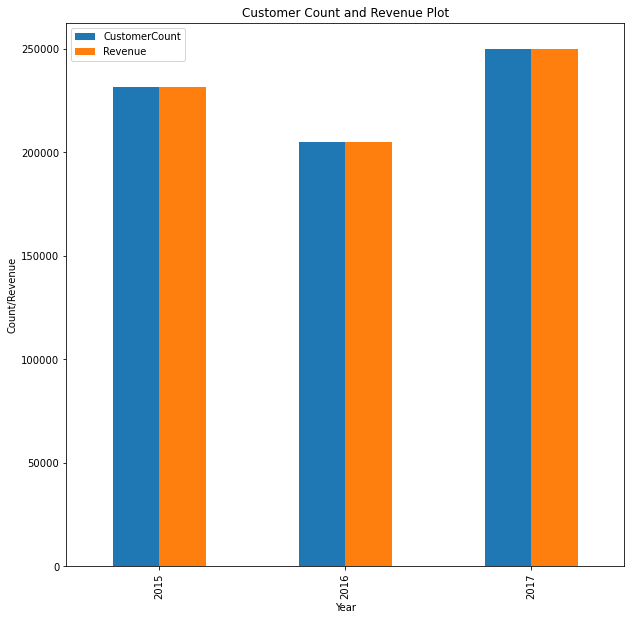

In [78]:
import pandas as pd

plotdata = pd.DataFrame({

    "CustomerCount":list(CustomerCount),

    "Revenue":list(Revenue)},

    index=["2015", "2016", "2017"])

plotdata.plot(kind="bar",figsize=(10, 10 ))

plt.title("Customer Count and Revenue Plot")
plt.xlabel("Year")
plt.ylabel("Count/Revenue")

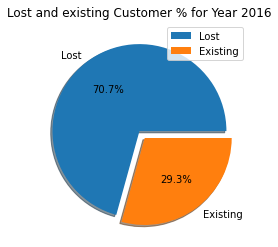

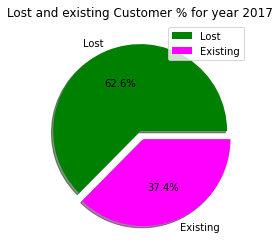

In [90]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array([lost2015cust.shape[0],ExistingCustomer16.shape[0]])
labels2016 = ["Lost","Existing"]
explode = (0, 0.1)
plt.pie(y,labels = labels2016,autopct='%1.1f%%', explode=explode,shadow =True)
plt.legend()
plt.title("Lost and existing Customer % for Year 2016")
plt.show() 

y = np.array([lost2016cust.shape[0],ExistingCustomer17.shape[0]])
labels2017 = ["Lost","Existing"]
explode = (0, 0.1)
color = ['green','magenta']
plt.pie(y,labels = labels2017,autopct='%1.1f%%', explode=explode,shadow =True,colors=color)
plt.legend()
plt.title("Lost and existing Customer % for year 2017")
plt.show() 

Case Study 1

In [116]:
loandf=pd.read_csv('./loans_full_schema.csv')
loandf.head(10)
#loandf['emp_title'].astype(bool).head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


In [118]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

Text(0.5, 1.0, 'Loan Amount Distribution')

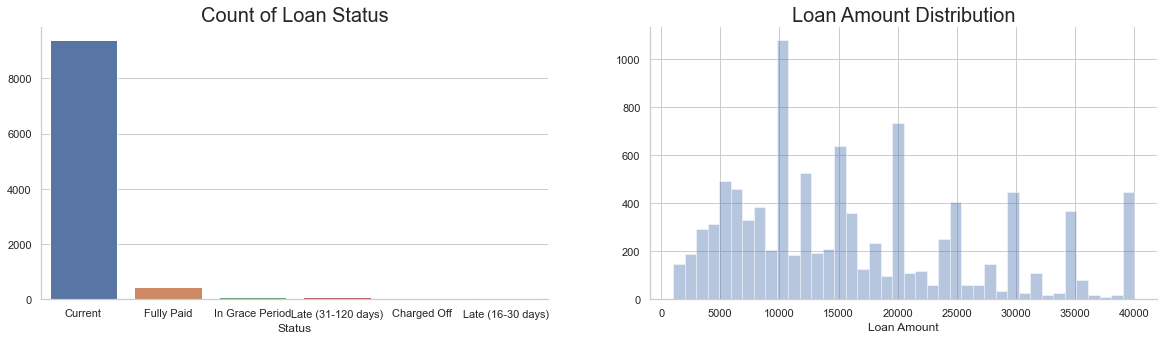

In [156]:
## Some Visual Analysis of dataset , Before feature extraction
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='loan_status', data=loandf, ax=axes[0])
sns.distplot(loandf['loan_amount'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

In [ ]:
'''There are spikes in low amount for loan distribution, hence we can see that there is some common categorical loan
his is an imbalance problem, because we have a lot more entries of people that have not fully paid their loans then 
people that fully paid. We can expect to probably do very well in terms of accuracy but our precision and recall are 
going to be the true metrics that we will have to evaluate our model based off of.
'''


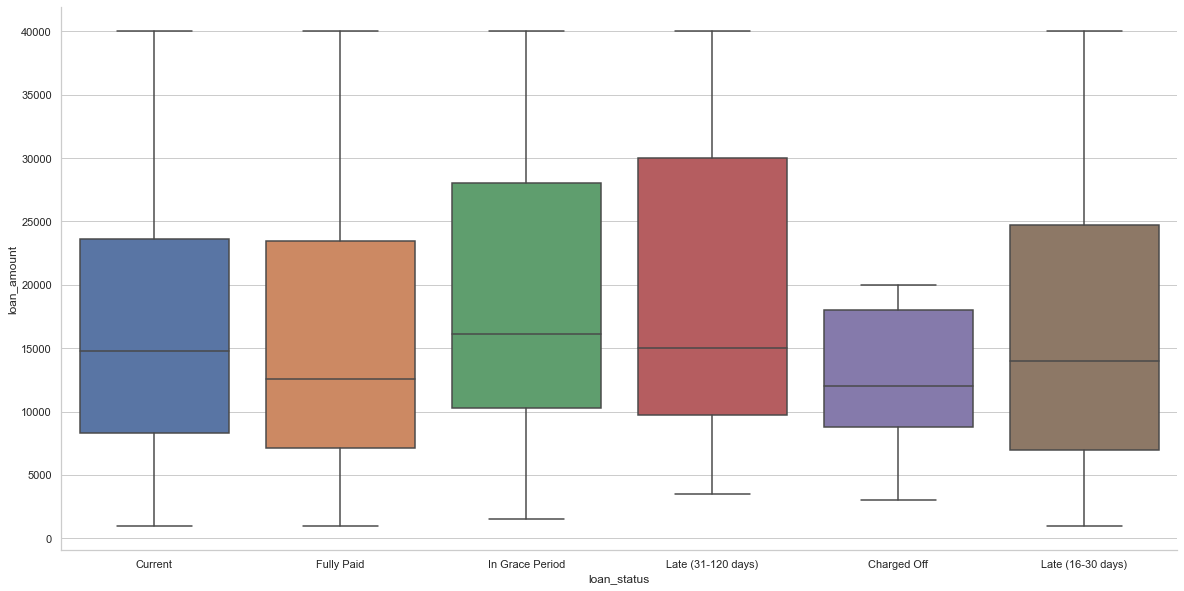

In [160]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='loan_status', y='loan_amount', data=loandf)
sns.despine()


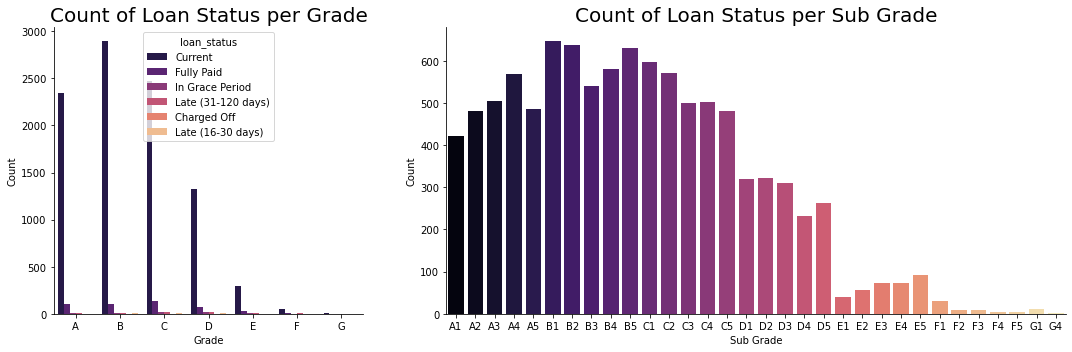

In [128]:
f, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=loandf, order=sorted(loandf['grade'].unique()), palette='magma', ax=axes[0])
sns.countplot(x='sub_grade', data=loandf, palette='magma', order=sorted(loandf['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

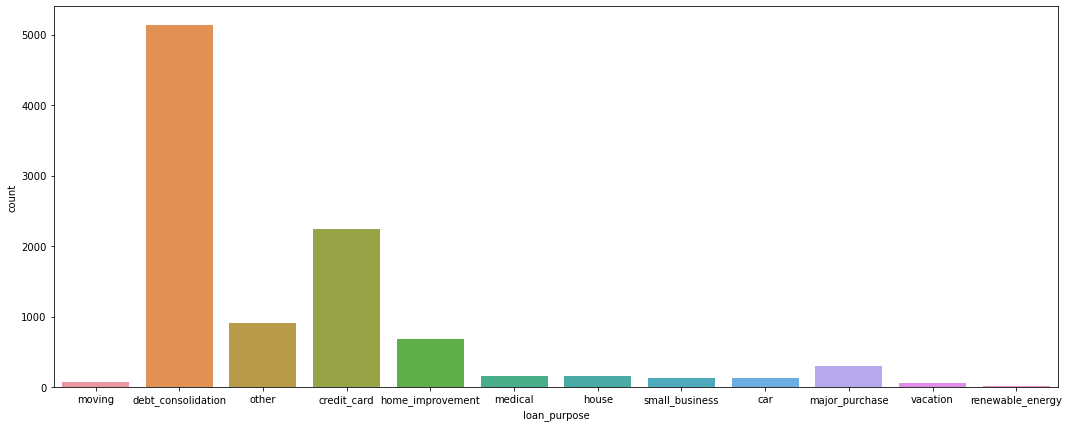

In [130]:
plt.figure(figsize=(18,7))
sns.countplot(x="loan_purpose", data=loandf)
plt.show() 
# looks like debt consolidation is the main reason for people taking loans.

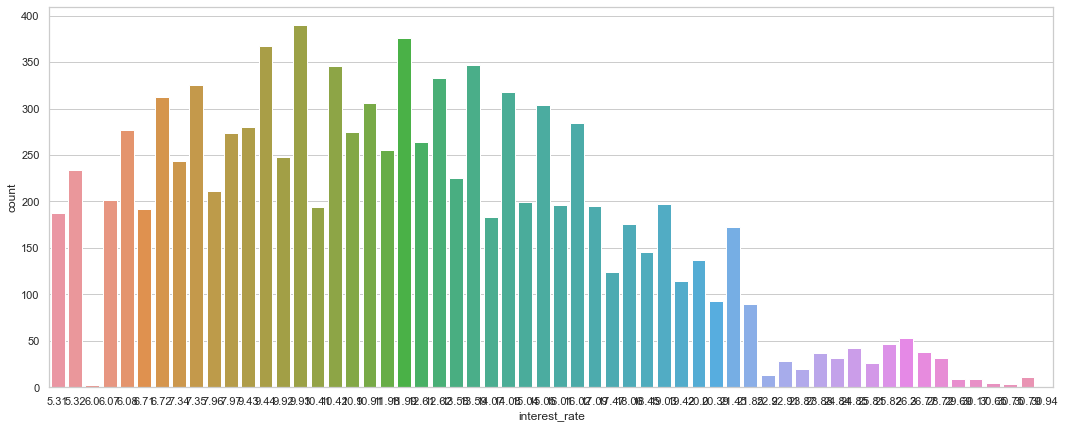

In [162]:
plt.figure(figsize=(18,7))
sns.countplot(x="interest_rate", data=loandf)
plt.show() 

In [131]:
loandf['application_type'].value_counts()

individual    8505
joint         1495
Name: application_type, dtype: int64

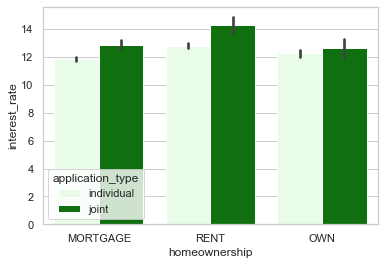

In [161]:
sns.barplot(x = 'homeownership', y = 'interest_rate', hue = 'application_type',data = loandf, color = 'green')
#It seems like home owners with Rent status have the maximum interest rate and people with joint application 
#type have more interest rate than individual application type.

In [133]:
##Lets clean dataset
#missing Values:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [136]:
miss_values = null_values(loandf) # we can see total of 10 columns with missing values.
miss_values.head(55)

Dataframe has 55 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
verification_income_joint,8545,85.4
annual_income_joint,8505,85.0
debt_to_income_joint,8505,85.0
months_since_90d_late,7715,77.2
months_since_last_delinq,5658,56.6
months_since_last_credit_inquiry,1271,12.7
emp_title,833,8.3
emp_length,817,8.2
num_accounts_120d_past_due,318,3.2
debt_to_income,24,0.2


In [139]:
#lets remove columns having more than 55%  missing values for better analysis
per = 55.0
min_count = int(((100-per)/100)*loandf.shape[0]+1)
loandf = loandf.dropna(axis=1,thresh = min_count)

In [140]:
miss_values = null_values(loandf)
miss_values.head(50)

Dataframe has 50 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
months_since_last_credit_inquiry,1271,12.7
emp_title,833,8.3
emp_length,817,8.2
num_accounts_120d_past_due,318,3.2
debt_to_income,24,0.2


In [141]:
loandf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
emp_length,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
delinq_2y,10000.0,0.216000,0.683660,0.00,0.0000,0.000,0.0000,1.300000e+01
earliest_credit_line,10000.0,2001.290000,7.795510,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,10000.0,22.679600,11.885439,2.00,14.0000,21.000,29.0000,8.700000e+01
open_credit_lines,10000.0,11.404400,5.868280,0.00,7.0000,10.000,14.0000,5.100000e+01
total_credit_limit,10000.0,183606.230400,187632.707777,0.00,51593.7500,114667.000,267550.0000,3.386034e+06
total_credit_utilized,10000.0,51049.063100,53636.731172,0.00,19185.5000,36927.000,65421.0000,9.424560e+05


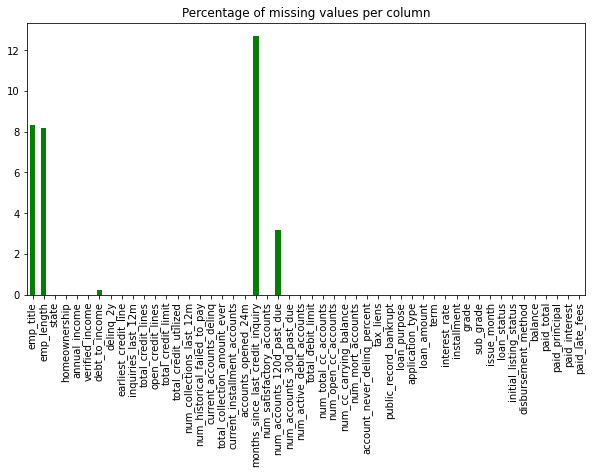

In [142]:
##There are still some columns with missing values
plt.figure(figsize=(10,5))  # we still have 5 columns with some null values
((loandf.isnull().sum())/len(loandf)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [143]:
#Lets check unique jobs titles count
print(loandf['emp_title'].nunique()) 
print(loandf['emp_title'].value_counts())

4741
manager                    218
owner                      204
teacher                    201
driver                     123
sales                       97
                          ... 
junior graphic designer      1
mgmt                         1
service technicia            1
country manager              1
cap supervisor               1
Name: emp_title, Length: 4741, dtype: int64


In [ ]:
#There are more than 4k unique job title, this will be chaos for feature analysis so we will drop this column


In [144]:
loandf = loandf.drop(['emp_title', 'emp_length'], axis = 1)

In [145]:
loandf['months_since_last_credit_inquiry'].fillna(int(loandf['months_since_last_credit_inquiry'].mean()), inplace=True)

In [146]:
loandf['num_accounts_120d_past_due'].fillna(int(loandf['num_accounts_120d_past_due'].mean()), inplace=True)

In [ ]:
'''We will fill the null values for month since last inquiry and num_accounts_120d_past_due with there mean values'''

In [147]:
#Since the debt to income has very less null values.
loandf.dropna()

,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,44,13,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,28,15,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,18,11,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,38,15,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [148]:
loandf.isnull().sum()

state                                0
homeownership                        0
annual_income                        0
verified_income                      0
debt_to_income                      24
delinq_2y                            0
earliest_credit_line                 0
inquiries_last_12m                   0
total_credit_lines                   0
open_credit_lines                    0
total_credit_limit                   0
total_credit_utilized                0
num_collections_last_12m             0
num_historical_failed_to_pay         0
current_accounts_delinq              0
total_collection_amount_ever         0
current_installment_accounts         0
accounts_opened_24m                  0
months_since_last_credit_inquiry     0
num_satisfactory_accounts            0
num_accounts_120d_past_due           0
num_accounts_30d_past_due            0
num_active_debit_accounts            0
total_debit_limit                    0
num_total_cc_accounts                0
num_open_cc_accounts     

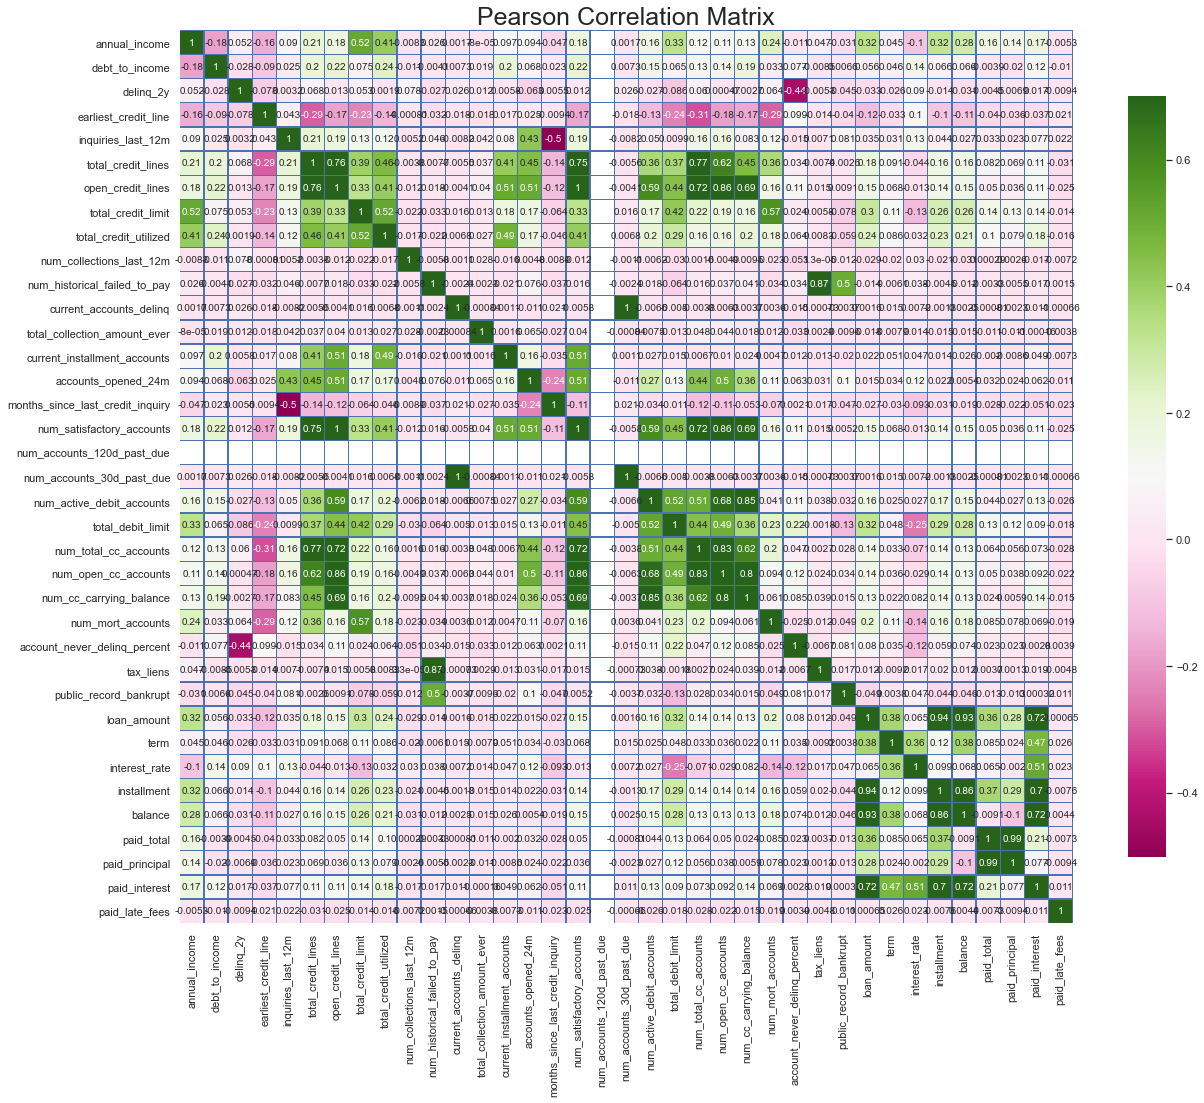

In [151]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(20,20))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(loandf.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="PiYG",linecolor='b',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
x=loandf[['annual_income', 'total_credit_lines','open_credit_lines','total_credit_limit','total_credit_utilized','installment','loan_amount','term','paid_interest']]
y=loandf[['interest_rate']]
le=LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [175]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [178]:
prd =reg_model.predict(X_test)

In [180]:
reg_model.score(X_test, y_test)

0.6324956331070843

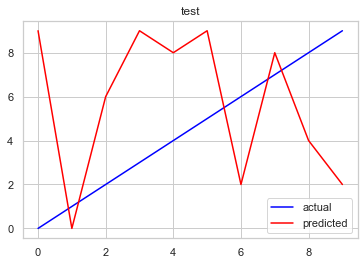

In [189]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,prd,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(prd))
    plt.plot(range(len(y_test)), y_test, color='blue',label ='actual')
    plt.plot(range(len(prd)), prd, color='red',label ='predicted')
    plt.title(regressorName)
    plt.legend()
    plt.show()
    
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")